In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
Health=pd.read_csv("healthcare-dataset-stroke-data.csv")
Health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
Health

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


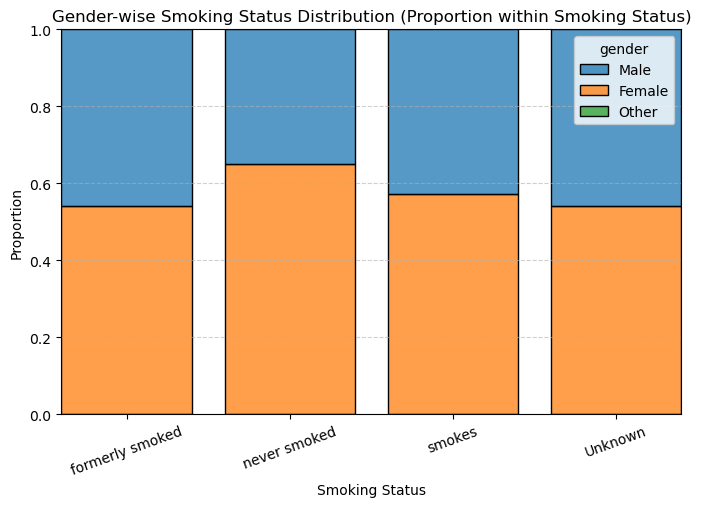

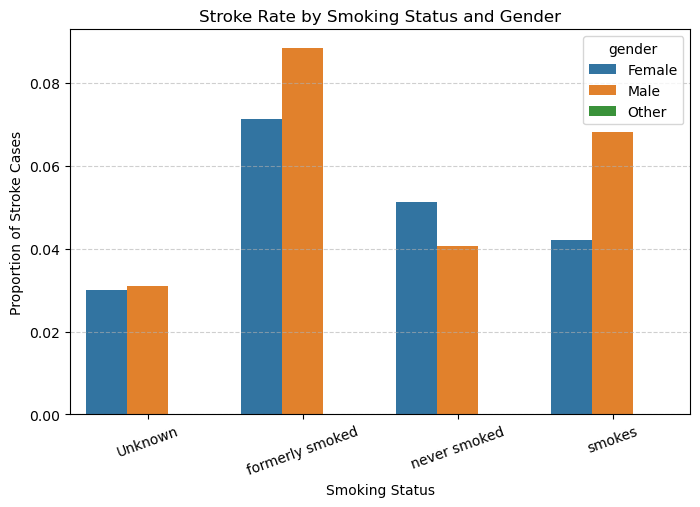

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

temp = Health.dropna(subset=['smoking_status'])

# Gender-wise smoking distribution (percentages)
plt.figure(figsize=(8,5))
sns.histplot(
    data=temp, 
    x='smoking_status', 
    hue='gender', 
    multiple='fill', 
    shrink=0.8
)
plt.title("Gender-wise Smoking Status Distribution (Proportion within Smoking Status)")
plt.ylabel("Proportion")
plt.xlabel("Smoking Status")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# stroke rate by smoking status and gender
stroke_rate_by_gender_smoking = temp.groupby(['gender','smoking_status'])['stroke'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=stroke_rate_by_gender_smoking,
    x='smoking_status',
    y='stroke',
    hue='gender'
)
plt.title("Stroke Rate by Smoking Status and Gender")
plt.ylabel("Proportion of Stroke Cases")
plt.xlabel("Smoking Status")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


C:\Users\ZASS\AppData\Local\Temp\ipykernel_16300\2846780593.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_age_smoking = temp.groupby(['age_group', 'smoking_status'])['stroke'].mean().reset_index()


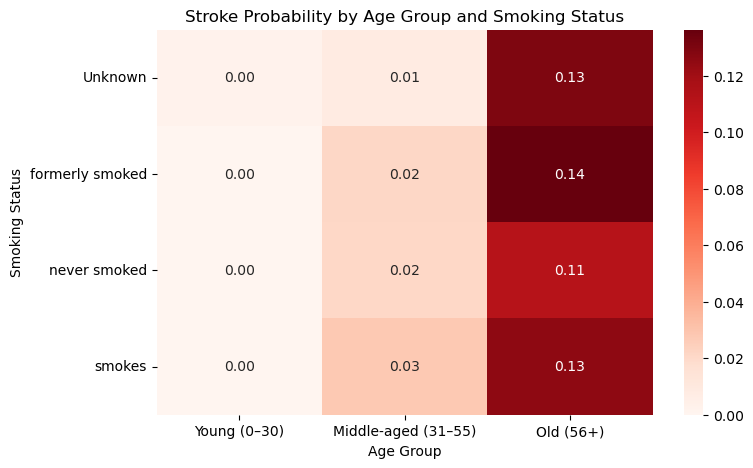

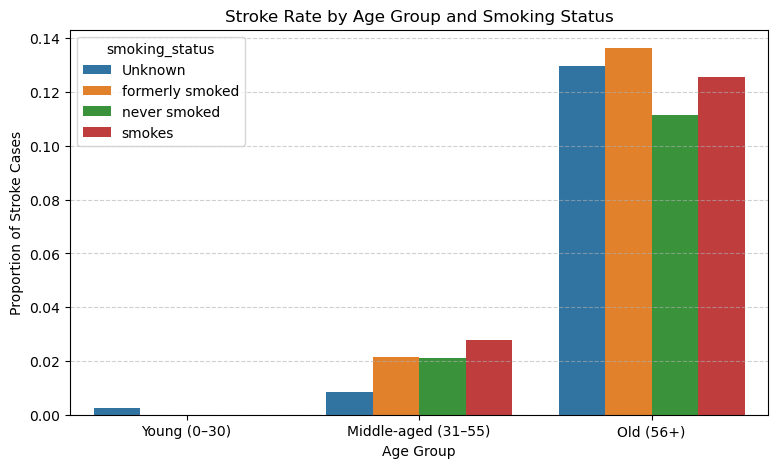

In [10]:
#Create age groups
Health['age_group'] = pd.cut(
    Health['age'], 
    bins=[0, 30, 55, Health['age'].max()], 
    labels=['Young (0–30)', 'Middle-aged (31–55)', 'Old (56+)']
)
temp = Health.dropna(subset=['smoking_status'])
stroke_age_smoking = temp.groupby(['age_group', 'smoking_status'])['stroke'].mean().reset_index()
pivot = stroke_age_smoking.pivot(index='smoking_status', columns='age_group', values='stroke')
plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, cmap='Reds', fmt=".2f")
plt.title("Stroke Probability by Age Group and Smoking Status")
plt.xlabel("Age Group")
plt.ylabel("Smoking Status")
plt.show()

plt.figure(figsize=(9,5))
sns.barplot(
    data=stroke_age_smoking,
    x='age_group',
    y='stroke',
    hue='smoking_status'
)
plt.title("Stroke Rate by Age Group and Smoking Status")
plt.ylabel("Proportion of Stroke Cases")
plt.xlabel("Age Group")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


The dataset provided contain multiple attributes or coloums and target colums was stroke with 0 indicating no stroke and 1 as a true value
My basic anylasis strated by comparing the gender with thier smokig status and found in majorite states male were ahead in state
My anlysis aslo that:
1.Age is the Most Dominant Risk Factor
  The most striking conclusion from plots is that age is the single most significant predictor of stroke risk among these all as age increase above 50 
  most of time stroke is true 
2.Smoking is a Risk Multiplier in Older Adults
  Within the high-risk "Old (56+)" group, smoking status plays a critical role
  Never Smoked: This group has the lowest stroke risk.This serves as a baseline for the older age group.
  Smokes: Current smokers have a significantly higher risk.
  Formerly Smoked: Interestingly, this group shows the highest risk of all
Summary
The analysis unequivocally demonstrates that people over 55 have a significantly higher risk of stroke.  Compared to people who have never smoked, older adults with a history of smoking—past and present—have a significantly higher risk of having a stroke.
  